In [4]:
import pandas as pd
from sklearn import svm 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection  import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.tree import DecisionTreeClassifier  
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.shape

(768, 9)

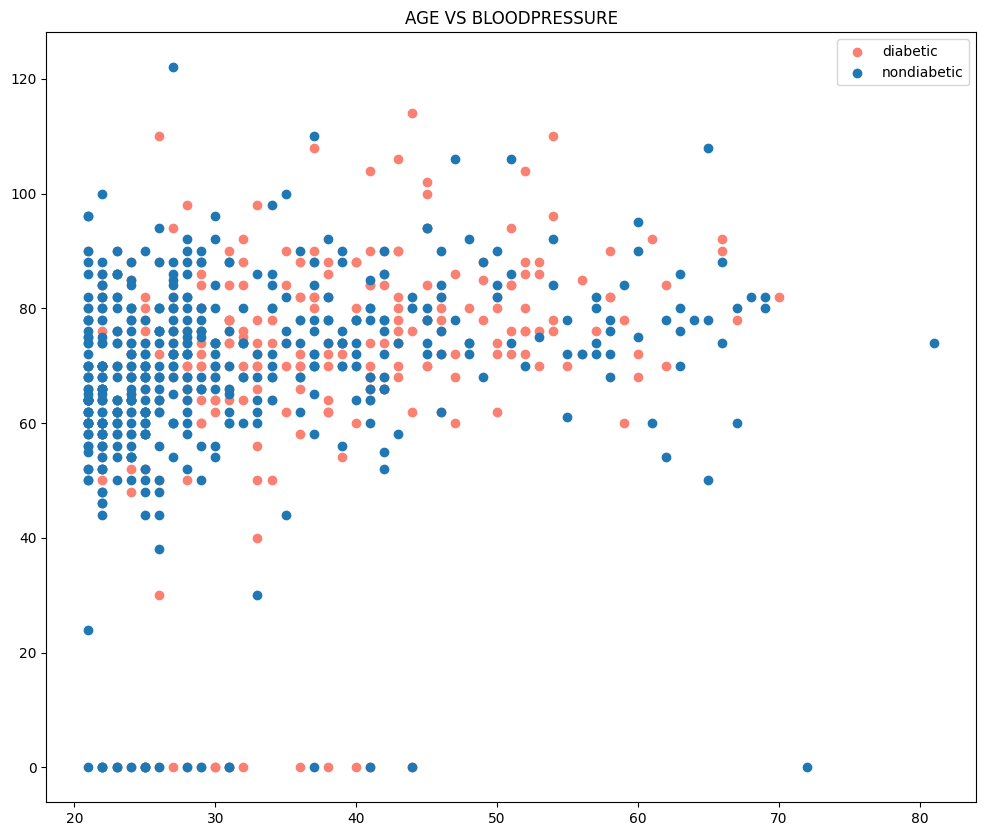

In [10]:
plt.figure(figsize=(12,10))
# age vs bloodpressure
plt.scatter(df.Age[df["Outcome"]==1] , df.BloodPressure[df["Outcome"]==1] , color="salmon")
# scatter plot for non diabetic peoples
plt.scatter(df.Age[df["Outcome"]==0] , df.BloodPressure[df["Outcome"]==0])
plt.title("AGE VS BLOODPRESSURE")
plt.legend(["diabetic","nondiabetic"])

<Axes: ylabel='Frequency'>

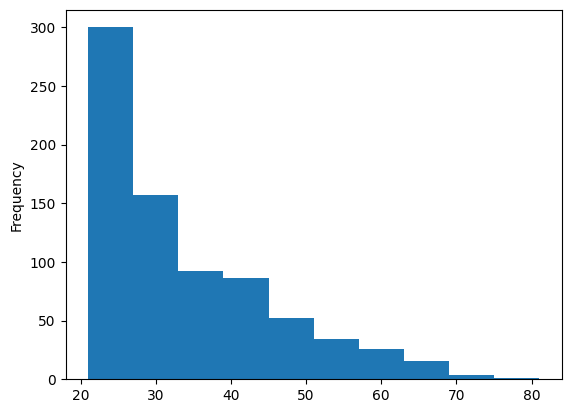

In [11]:
# age column with histogram plot
df.Age.plot.hist()

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(9.5, -0.5)

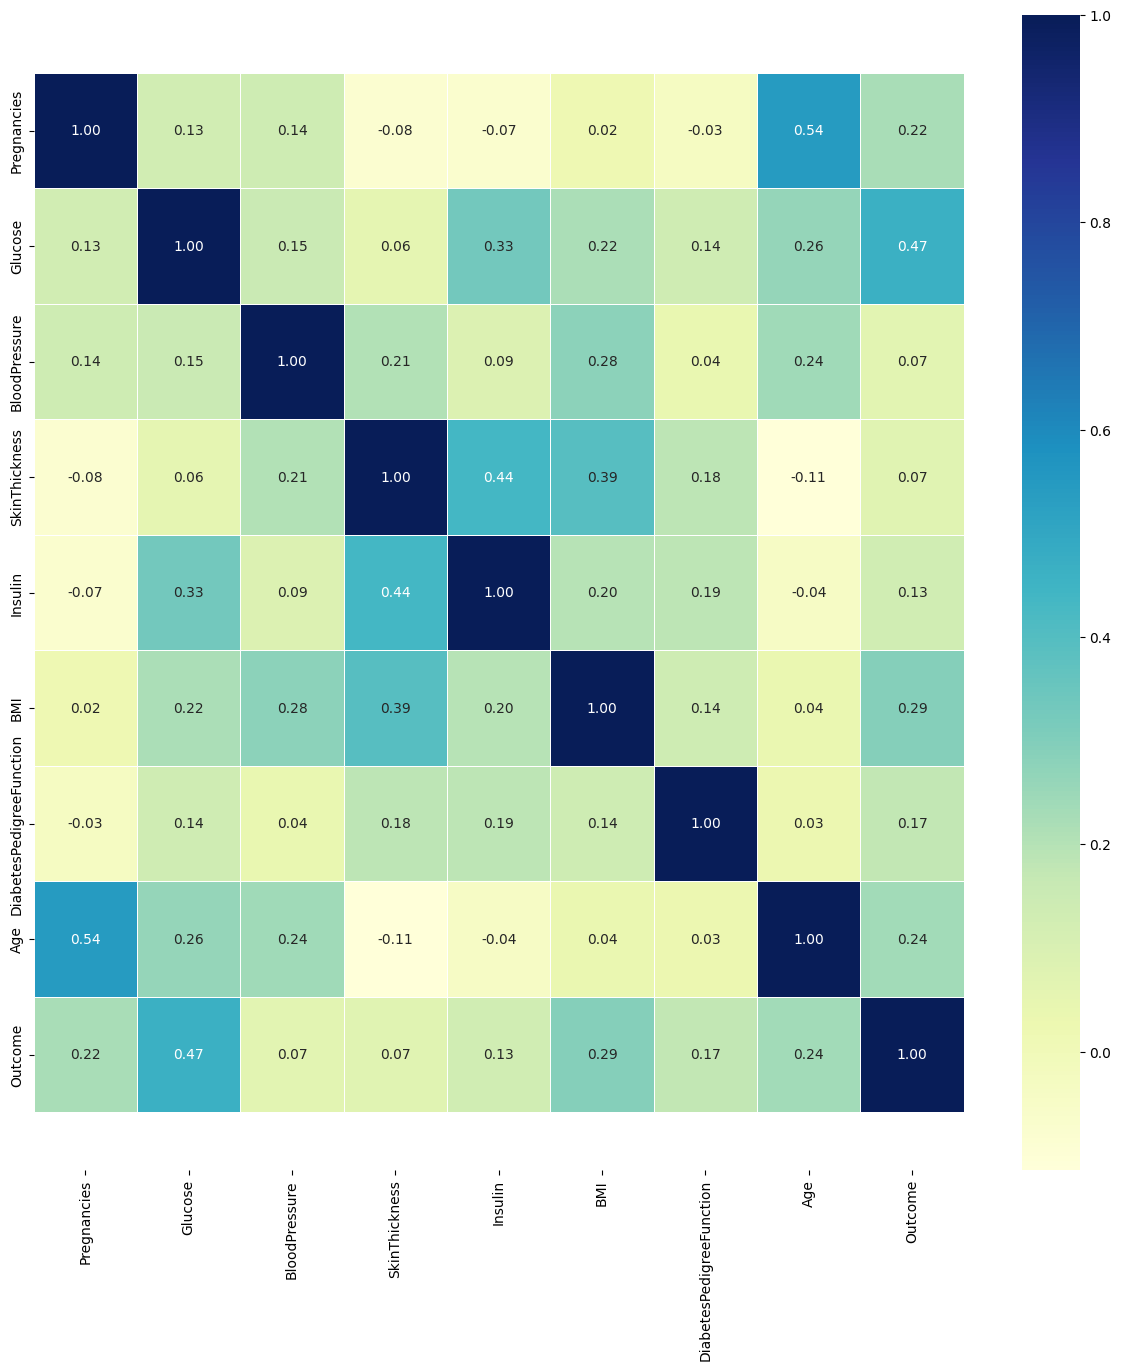

In [13]:
matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(matrix,annot = True, linewidths =0.5,
                cmap="YlGnBu", fmt = ".2f")
bottom , top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 ,top -0.5 )

## Creating train test split

In [14]:
x = df.drop(["Outcome"],axis=1)

In [15]:
y = df["Outcome"]

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [17]:
xtrain.shape

(537, 8)

In [18]:
xtest.shape

(231, 8)

In [19]:
ytrain.shape

(537,)

In [20]:
# Preprocessing Dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(xtrain)
X_test = sc_X.transform(xtest)

# Model training

In [21]:
model = {    "DT" : DecisionTreeClassifier(criterion='entropy', random_state=0) , 
             "svm2":svm.SVC(kernel = 'linear' ,C=0.01)
        }
#creating function for fitting in models
def fit_model(model,xtrain,ytrain,xtest,ytest):
    model_scores={}
    for name , item in model.items():
        item.fit(xtrain,ytrain)
        model_scores[name] = item.score(xtest,ytest)
    return model_scores    

In [22]:
scores = fit_model(model,xtrain,ytrain,xtest,ytest)
scores

{'DT': 0.6883116883116883, 'svm2': 0.7662337662337663}

<Axes: >

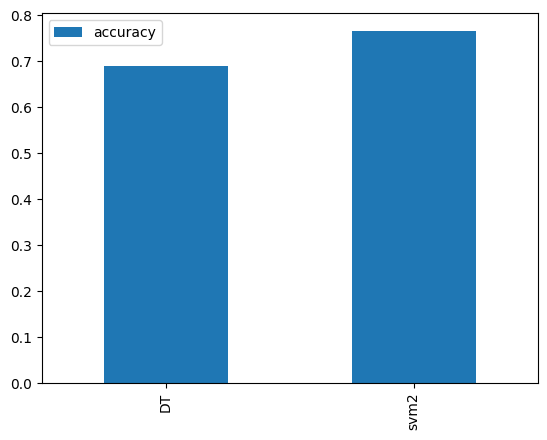

In [23]:
# here we observe that SVM gives more accuracy as compared to decision trees so 
# we'll perform hyperparameter tunning on SVM model only
scores = pd.DataFrame(scores,index=["accuracy"])
scores.T.plot.bar()

# Hyperparameter tunning on SVM classifier

In [24]:
params = {'C':( 0.01,0.04,0.07,0.2,0.5)}

svm1 = svm.SVC(kernel = 'linear')

svm_grid=GridSearchCV(svm1, params , n_jobs =1,cv=5, scoring=accuracy_score,verbose=1)

In [25]:
svm_grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=1,
             param_grid={'C': (0.01, 0.04, 0.07, 0.2, 0.5)},
             scoring=<function accuracy_score at 0x7f9f94106dd0>, verbose=1)

In [26]:
svm_grid.best_params_

{'C': 0.01}

In [34]:
ypred = svm_grid.predict(xtest)
ytrain_pred = svm_grid.predict(xtrain)

In [35]:
from sklearn.metrics import r2_score
r2_score(ytrain,ytrain_pred)

0.01445472470802378

In [36]:
r2_score(ytest,ypred)

-0.04524886877828016

In [41]:
linsvm_clf = svm_grid.best_estimator_
accuracy_score(ytest,linsvm_clf.predict(xtest))

0.7662337662337663

# Predicting diabetic person

In [46]:
input = svm_grid.predict([[1,93,70,31,0,30.4,0.315,23]])
if input == 1:
  print("diabetic person")
else:
  print(" Non-diabetic person")  

 Non-diabetic person
